## Testing and accuracy assessment of the implemented spam classifier.

### Classifier: Naive Multinomial Bayes classifier.

The training of the classifier was done on the **email_dataset 3.**

The tests will be performed on two datasets:

1. The dataset that is located in **email_dataset 1**. 
2. The dataset that is located in **email_dataset 2**. 

Testing will be conducted on three classifiers with the same **word_frequencies** dataset but with different probabilities for the ham and spam classes.

1. P(ham) = 75% (0.75) and P(spam) = 25% (0.25).
2. P(ham) = 25% (0.25) and P(spam) = 75% (0.75).
3. P(ham) = 50% (0.50) and P(spam) = 50% (0.50).

For all tests, the same smoothing factor will be used, set to 1, i.e., Laplace smoothing is applied.

<hr>

### Importing the necessary libraries and the implemented classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import SpamDetector

%matplotlib inline

#### Initializing variables with file path addresses.

In [2]:
path_to_email_dataset_1 = '../dataset/email_dataset_1/spam_ham_dataset.csv'
path_to_email_dataset_2 = '../dataset/email_dataset_2/emails.csv'

path_to_email_ratios_case_1 = '../dataset/for_test_Naive_Multinomial_Bayes_classifier/email_ratios_case_1.csv'
path_to_email_ratios_case_2 = '../dataset/for_test_Naive_Multinomial_Bayes_classifier/email_ratios_case_2.csv'
path_to_email_ratios_case_3 = '../dataset/for_test_Naive_Multinomial_Bayes_classifier/email_ratios_case_3.csv'

path_to_dataset_word_frequencies = '../dataset/email_dataset_3/model_data/word_frequencies.csv'

#### Initialize variables to store the classification result.

Key Explanations:
- **True Positive (TP)**: expected spam, predicted as spam -> correct.
- **True Negative (TN)**: expected ham, predicted as ham -> correct.
- **False Positive (FP)**: expected spam, predicted as ham -> incorrect.
- **False Negative (FN)**: expected ham, predicted as spam -> incorrect.

In [3]:
result_dataset1_case1 = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
result_dataset1_case2 = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
result_dataset1_case3 = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

result_dataset2_case1 = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
result_dataset2_case2 = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
result_dataset2_case3 = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

#### Initializing Naive Multinomial Bayes classifiers.

In [4]:
MultinomialNB_case1 = SpamDetector.SpamDetector(path_to_dataset_word_frequencies, path_to_email_ratios_case_1)
MultinomialNB_case2 = SpamDetector.SpamDetector(path_to_dataset_word_frequencies, path_to_email_ratios_case_2)
MultinomialNB_case3 = SpamDetector.SpamDetector(path_to_dataset_word_frequencies, path_to_email_ratios_case_3)

#### Visualizing three cases of probabilities P(ham) and P(spam).

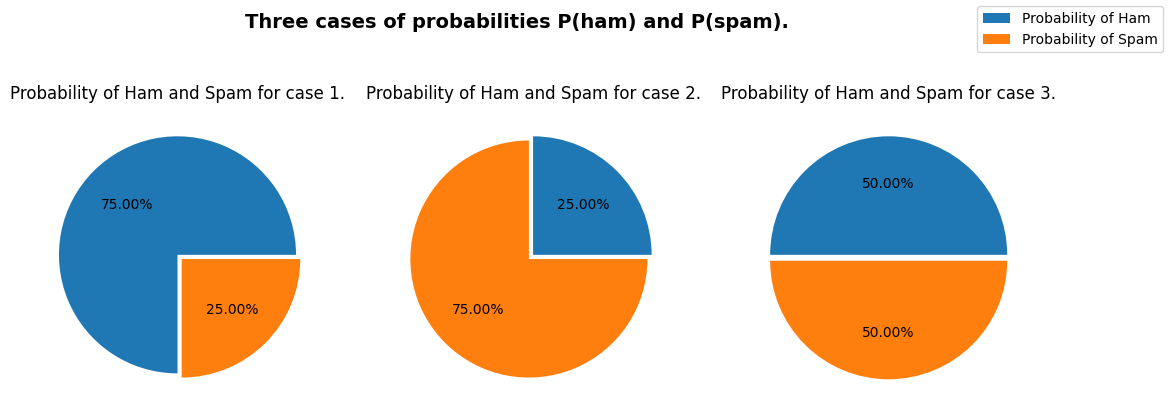

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (13, 5))

fig.suptitle('Three cases of probabilities P(ham) and P(spam).', fontsize=14, fontweight='bold')

case1 = pd.read_csv(path_to_email_ratios_case_1, index_col=0)
case2 = pd.read_csv(path_to_email_ratios_case_2, index_col=0)
case3 = pd.read_csv(path_to_email_ratios_case_3, index_col=0)

ax[0].set_title("Probability of Ham and Spam for case 1.", fontsize=12)
ax[1].set_title("Probability of Ham and Spam for case 2.", fontsize=12)
ax[2].set_title("Probability of Ham and Spam for case 3.", fontsize=12)

ax[0].pie([case1.ham['ratios-to-total-emails'], case1.spam['ratios-to-total-emails']], explode=[0.0, 0.05], autopct='%1.2f%%')
ax[1].pie([case2.ham['ratios-to-total-emails'], case2.spam['ratios-to-total-emails']], explode=[0.0, 0.05], autopct='%1.2f%%')
ax[2].pie([case3.ham['ratios-to-total-emails'], case3.spam['ratios-to-total-emails']], explode=[0.0, 0.05], autopct='%1.2f%%')

fig.legend(labels=["Probability of Ham", "Probability of Spam"], loc='upper right')

plt.show()

<hr>

#### Implementation of a function calculating classification results.

In [6]:
def calculating_classification_results(data: dict[str, int], predicted_result: int, expected_result: int) -> dict[str, int]:
    """
    Function for calculating classification results and updating the data dictionary of classifier results.

    Parameters:
        data (dict[str, int]): Dictionary for counting different result combinations (the keys of the dictionary should be the following: 'TP', 'TN', 'FP', 'FN').
        predicted_result (int): Predicted result (0 for ham, 1 for spam).
        expected_result (int): Expected result (0 for ham, 1 for spam).

    Returns:
        dict[str, int]: Updated data dictionary.
    """

    if predicted_result == 1 and expected_result == 1: # True Positive (TP): expected spam, predicted as spam -> correct.
        data['TP'] += 1
        return data

    if predicted_result == 0 and expected_result == 0: # True Negative (TN): expected ham, predicted as ham -> correct.
        data['TN'] += 1
        return data

    if predicted_result == 0 and expected_result == 1: # False Positive (FP): expected spam, predicted as ham -> incorrect.
        data['FP'] += 1
        return data
    
    if predicted_result == 1 and expected_result == 0: # False Negative (FN): expected ham, predicted as spam -> incorrect.
        data['FN'] += 1
        return data

#### Implementation of a function for plotting the confusion matrix.

In [7]:
def plot_confusion_matrix(TP: int, TN: int, FP: int, FN: int, ax: plt.Axes) -> None:
    """
    Function for plotting the confusion matrix of a spam email classifier.

    Parameters:
        - TP (int): Number of true positives.
        - TN (int): Number of true negatives.
        - FP (int): Number of false positives.
        - FN (int): Number of false negatives.
        - ax (matplotlib.axes._axes.Axes, optional): The Axes object to plot the confusion matrix on.

    Returns:
        - None

    Note:
        The 'ax' object is passed to the function by reference and is modified inside the function;
        there is no need for an explicit return of this object. The function can directly alter the
        state of the 'ax' object, and these changes will be visible in the calling code. Returning
        the 'ax' object in this case is not necessary.
    """
        
    # Declaration of the confusion matrix.
    confusion_matrix = np.array([[TP, FP], [FN, TN]])

    # Plotting of the confusion matrix
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    plt.colorbar(im, ax=ax)

    classes = ['Spam', 'Ham']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)

    ax.set_xlabel('Predicted class')
    ax.set_ylabel('Expected class')

    # Adding annotations.
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='black')

#### Implementation of functions for calculating metrics.

In [8]:
def accuracy(TP: int, TN: int, FP: int, FN: int) -> float:
    """
    Calculate the accuracy of a classification model.

    Parameters:
        - TP (int): Number of true positives.
        - TN (int): Number of true negatives.
        - FP (int): Number of false positives.
        - FN (int): Number of false negatives.

    Returns:
        - float: Accuracy of the classification model, computed as (TP + TN) / (TP + TN + FP + FN).
    """

    return (TP + TN) / (TP + TN + FP + FN)

In [9]:
def precision(TP: int, FP: int) -> float:
    """
    Calculate precision for a classification model.

    Parameters:
        - TP (int): Number of true positives.
        - FP (int): Number of false positives.

    Returns:
        - float: Precision of the classification model, computed as TP / (TP + FP).
    """

    return TP / (TP + FP)

In [10]:
def recall(TP: int, FN: int) -> float:
    """
    Calculate recall for a classification model.

    Parameters:
        - TP (int): Number of true positives.
        - FN (int): Number of false negatives.

    Returns:
        - float: Recall of the classification model, computed as TP / (TP + FN).
    """

    return TP / (TP + FN)

In [11]:
def f1_score(precision: float, recall: float) -> float:
    """
    Calculate the F1 score for a classification model.

    Parameters:
        - precision (float): Precision of the classification model.
        - recall (float): Recall of the classification model.

    Returns:
        - float: F1 score, computed as 2 * (precision * recall) / (precision + recall).
    """

    return 2 * (precision * recall) / (precision + recall)

<hr>

### Testing the classifier on dataset 1.

#### Loading the dataset and preparing columns for testing.

In [12]:
dataset1 = pd.read_csv(path_to_email_dataset_1)
dataset1 = dataset1.drop(['Unnamed: 0', 'label'], axis = 1)
dataset1 = dataset1.rename(columns={'label_num': 'label'})
dataset1

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


#### Testing...

In [13]:
for i in range(len(dataset1)):
    result_dataset1_case1 = calculating_classification_results(result_dataset1_case1, MultinomialNB_case1.detecting_spam(dataset1.text[i]), dataset1.label[i]) 
    result_dataset1_case2 = calculating_classification_results(result_dataset1_case2, MultinomialNB_case2.detecting_spam(dataset1.text[i]), dataset1.label[i])
    result_dataset1_case3 = calculating_classification_results(result_dataset1_case3, MultinomialNB_case3.detecting_spam(dataset1.text[i]), dataset1.label[i])

#### Visualization of test results.

In [14]:
print(f"Total ham emails = {len(dataset1[dataset1['label']==0])}")
print(f"Total spam emails = {len(dataset1[dataset1['label']==1])}\n")

print(f"result_dataset1_case1 = {result_dataset1_case1}")
print(f"result_dataset1_case2 = {result_dataset1_case2}")
print(f"result_dataset1_case3 = {result_dataset1_case3}")

Total ham emails = 3672
Total spam emails = 1499

result_dataset1_case1 = {'TP': 1433, 'TN': 3510, 'FP': 66, 'FN': 162}
result_dataset1_case2 = {'TP': 1480, 'TN': 3468, 'FP': 19, 'FN': 204}
result_dataset1_case3 = {'TP': 1445, 'TN': 3489, 'FP': 54, 'FN': 183}


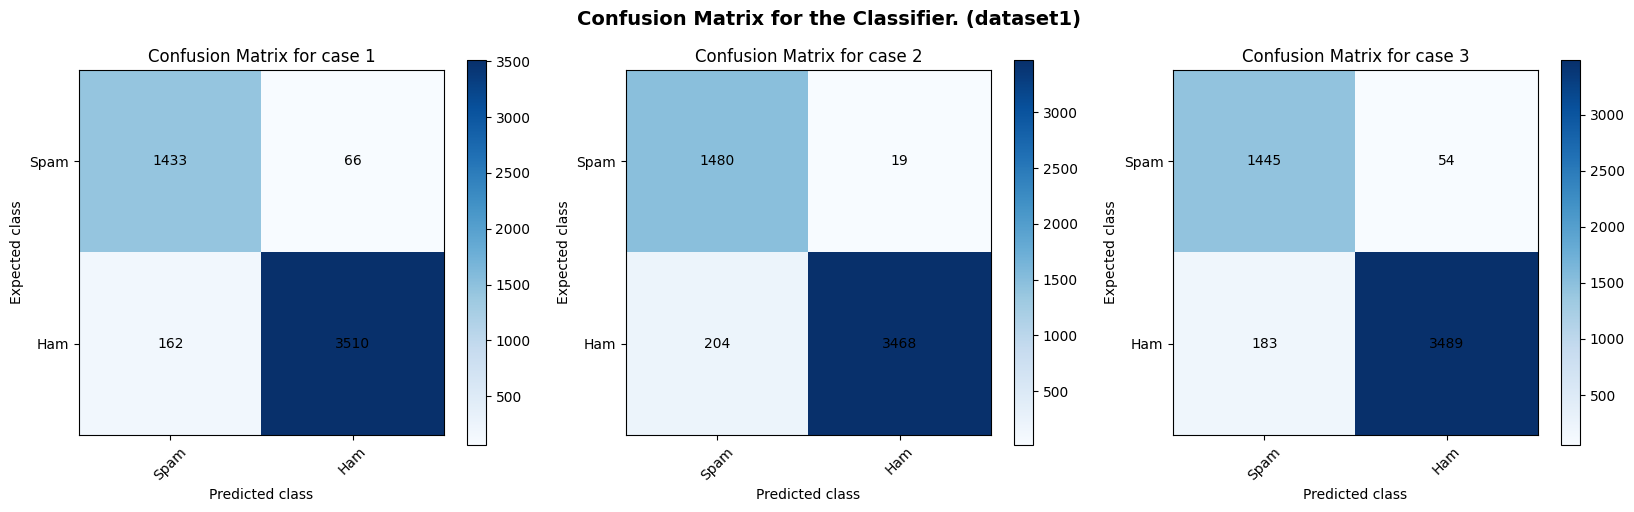

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

fig.suptitle('Confusion Matrix for the Classifier. (dataset1)', fontsize=14, fontweight='bold')

plot_confusion_matrix(result_dataset1_case1['TP'], result_dataset1_case1['TN'], result_dataset1_case1['FP'], result_dataset1_case1['FN'], ax[0])
plot_confusion_matrix(result_dataset1_case2['TP'], result_dataset1_case2['TN'], result_dataset1_case2['FP'], result_dataset1_case2['FN'], ax[1])
plot_confusion_matrix(result_dataset1_case3['TP'], result_dataset1_case3['TN'], result_dataset1_case3['FP'], result_dataset1_case3['FN'], ax[2])

# Clarification of graph titles
ax[0].set_title('Confusion Matrix for case 1')
ax[1].set_title('Confusion Matrix for case 2')
ax[2].set_title('Confusion Matrix for case 3')

plt.show()

#### Calculation of testing metrics.

##### MultinomialNB_case1

In [16]:
TP = result_dataset1_case1['TP']
TN = result_dataset1_case1['TN']
FP = result_dataset1_case1['FP']
FN = result_dataset1_case1['FN']

print(f"Accuracy for MultinomialNB_case1 = {accuracy(TP, TN, FP, FN)}")
print(f"Precision for MultinomialNB_case1 = {precision(TP, FP)}")
print(f"Recall for MultinomialNB_case1 = {recall(TP, FN)}")
print(f"F1 score for MultinomialNB_case1 = {f1_score(precision(TP, FP), recall(TP, FN))}")

Accuracy for MultinomialNB_case1 = 0.9559079481725005
Precision for MultinomialNB_case1 = 0.9559706470980653
Recall for MultinomialNB_case1 = 0.8984326018808777
F1 score for MultinomialNB_case1 = 0.9263089851325145


##### MultinomialNB_case2

In [17]:
TP = result_dataset1_case2['TP']
TN = result_dataset1_case2['TN']
FP = result_dataset1_case2['FP']
FN = result_dataset1_case2['FN']

print(f"Accuracy for MultinomialNB_case2 = {accuracy(TP, TN, FP, FN)}")
print(f"Precision for MultinomialNB_case2 = {precision(TP, FP)}")
print(f"Recall for MultinomialNB_case2 = {recall(TP, FN)}")
print(f"F1 score for MultinomialNB_case2 = {f1_score(precision(TP, FP), recall(TP, FN))}")

Accuracy for MultinomialNB_case2 = 0.9568748791336299
Precision for MultinomialNB_case2 = 0.9873248832555037
Recall for MultinomialNB_case2 = 0.8788598574821853
F1 score for MultinomialNB_case2 = 0.9299403078856425


##### MultinomialNB_case3

In [18]:
TP = result_dataset1_case3['TP']
TN = result_dataset1_case3['TN']
FP = result_dataset1_case3['FP']
FN = result_dataset1_case3['FN']

print(f"Accuracy for MultinomialNB_case3 = {accuracy(TP, TN, FP, FN)}")
print(f"Precision for MultinomialNB_case3 = {precision(TP, FP)}")
print(f"Recall for MultinomialNB_case3 = {recall(TP, FN)}")
print(f"F1 score for MultinomialNB_case3 = {f1_score(precision(TP, FP), recall(TP, FN))}")

Accuracy for MultinomialNB_case3 = 0.9541674724424676
Precision for MultinomialNB_case3 = 0.9639759839893263
Recall for MultinomialNB_case3 = 0.8875921375921376
F1 score for MultinomialNB_case3 = 0.9242085065558043


<hr>

### Testing the classifier on dataset 2.
#### Loading the dataset and preparing columns for testing.

In [19]:
dataset2 = pd.read_csv(path_to_email_dataset_2)
dataset2 = dataset2.rename(columns={'spam': 'label'})
dataset2

,text,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


#### Testing...

In [20]:
for i in range(len(dataset2)):
    result_dataset2_case1 = calculating_classification_results(result_dataset2_case1, MultinomialNB_case1.detecting_spam(dataset2.text[i]), dataset2.label[i]) 
    result_dataset2_case2 = calculating_classification_results(result_dataset2_case2, MultinomialNB_case2.detecting_spam(dataset2.text[i]), dataset2.label[i])
    result_dataset2_case3 = calculating_classification_results(result_dataset2_case3, MultinomialNB_case3.detecting_spam(dataset2.text[i]), dataset2.label[i])

#### Visualization of test results.

In [21]:
print(f"Total ham emails = {len(dataset2[dataset2['label']==0])}")
print(f"Total spam emails = {len(dataset2[dataset2['label']==1])}\n")

print(f"result_dataset2_case1 = {result_dataset2_case1}")
print(f"result_dataset2_case2 = {result_dataset2_case2}")
print(f"result_dataset2_case3 = {result_dataset2_case3}")

Total ham emails = 4360
Total spam emails = 1368

result_dataset2_case1 = {'TP': 1308, 'TN': 4244, 'FP': 60, 'FN': 116}
result_dataset2_case2 = {'TP': 1325, 'TN': 4200, 'FP': 43, 'FN': 160}
result_dataset2_case3 = {'TP': 1315, 'TN': 4230, 'FP': 53, 'FN': 130}


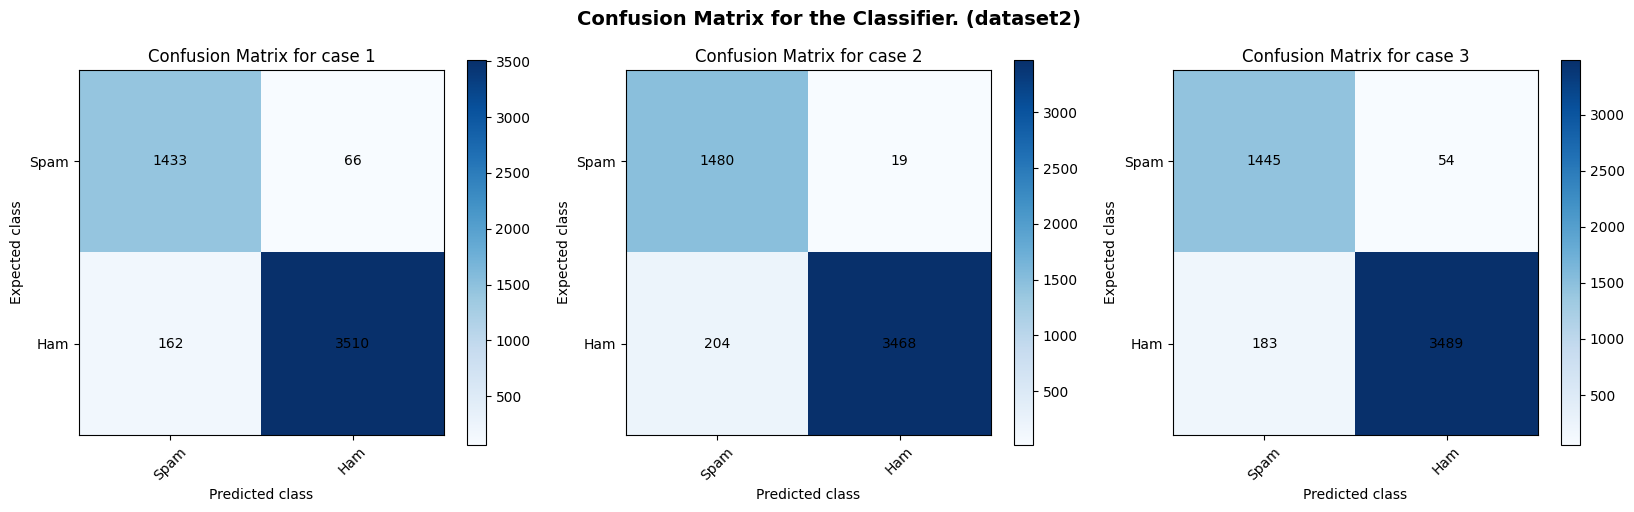

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

fig.suptitle('Confusion Matrix for the Classifier. (dataset2)', fontsize=14, fontweight='bold')

plot_confusion_matrix(result_dataset1_case1['TP'], result_dataset1_case1['TN'], result_dataset1_case1['FP'], result_dataset1_case1['FN'], ax[0])
plot_confusion_matrix(result_dataset1_case2['TP'], result_dataset1_case2['TN'], result_dataset1_case2['FP'], result_dataset1_case2['FN'], ax[1])
plot_confusion_matrix(result_dataset1_case3['TP'], result_dataset1_case3['TN'], result_dataset1_case3['FP'], result_dataset1_case3['FN'], ax[2])

# Clarification of graph titles
ax[0].set_title('Confusion Matrix for case 1')
ax[1].set_title('Confusion Matrix for case 2')
ax[2].set_title('Confusion Matrix for case 3')

plt.show()

#### Calculation of testing metrics.

##### MultinomialNB_case1

In [23]:
TP = result_dataset2_case1['TP']
TN = result_dataset2_case1['TN']
FP = result_dataset2_case1['FP']
FN = result_dataset2_case1['FN']

print(f"Accuracy for MultinomialNB_case1 = {accuracy(TP, TN, FP, FN)}")
print(f"Precision for MultinomialNB_case1 = {precision(TP, FP)}")
print(f"Recall for MultinomialNB_case1 = {recall(TP, FN)}")
print(f"F1 score for MultinomialNB_case1 = {f1_score(precision(TP, FP), recall(TP, FN))}")

Accuracy for MultinomialNB_case1 = 0.9692737430167597
Precision for MultinomialNB_case1 = 0.956140350877193
Recall for MultinomialNB_case1 = 0.9185393258426966
F1 score for MultinomialNB_case1 = 0.9369627507163324


##### MultinomialNB_case2

In [24]:
TP = result_dataset2_case2['TP']
TN = result_dataset2_case2['TN']
FP = result_dataset2_case2['FP']
FN = result_dataset2_case2['FN']

print(f"Accuracy for MultinomialNB_case2 = {accuracy(TP, TN, FP, FN)}")
print(f"Precision for MultinomialNB_case2 = {precision(TP, FP)}")
print(f"Recall for MultinomialNB_case2 = {recall(TP, FN)}")
print(f"F1 score for MultinomialNB_case2 = {f1_score(precision(TP, FP), recall(TP, FN))}")

Accuracy for MultinomialNB_case2 = 0.9645600558659218
Precision for MultinomialNB_case2 = 0.9685672514619883
Recall for MultinomialNB_case2 = 0.8922558922558923
F1 score for MultinomialNB_case2 = 0.9288468279004557


##### MultinomialNB_case3

In [25]:
TP = result_dataset2_case3['TP']
TN = result_dataset2_case3['TN']
FP = result_dataset2_case3['FP']
FN = result_dataset2_case3['FN']

print(f"Accuracy for MultinomialNB_case3 = {accuracy(TP, TN, FP, FN)}")
print(f"Precision for MultinomialNB_case3 = {precision(TP, FP)}")
print(f"Recall for MultinomialNB_case3 = {recall(TP, FN)}")
print(f"F1 score for MultinomialNB_case3 = {f1_score(precision(TP, FP), recall(TP, FN))}")

Accuracy for MultinomialNB_case3 = 0.9680516759776536
Precision for MultinomialNB_case3 = 0.9612573099415205
Recall for MultinomialNB_case3 = 0.9100346020761245
F1 score for MultinomialNB_case3 = 0.9349448986846783


<hr>